In [1]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
from itertools import combinations
%matplotlib inline

In [3]:
#read the data
df = pd.read_csv('listings_clean.csv')
print(df.columns.values)
df.head()

['id' 'host_since' 'zipcode' 'latitude' 'longitude' 'property_type'
 'room_type' 'accommodates' 'bathrooms' 'bedrooms' 'beds' 'bed_type'
 'guests_included' 'minimum_nights' 'maximum_nights' 'availability_30'
 'availability_60' 'availability_90' 'availability_365' 'number_of_reviews'
 'first_review' 'last_review' 'review_scores_rating'
 'review_scores_accuracy' 'review_scores_cleanliness'
 'review_scores_checkin' 'review_scores_communication'
 'review_scores_location' 'review_scores_value' 'host_listing_count'
 'price']


,id,host_since,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count,price
0,1069266,1926,10022.0,40.756852,-73.964754,0,0,2,1.0,1.0,...,2542.0,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1,160
1,1846722,1625,NaN,40.830599,-73.941014,0,0,10,1.0,3.0,...,2554.0,85.0,8.0,8.0,9.0,8.0,7.0,8.0,2,105
2,2061725,1831,11221.0,40.692189,-73.924120,0,1,2,1.0,1.0,...,2554.0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4,58
3,44974,953,10011.0,40.734751,-74.002592,0,0,2,1.0,1.0,...,2494.0,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1,185
4,4701675,2479,10011.0,40.745282,-73.997836,0,0,2,1.0,1.0,...,2533.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,195


In [4]:
n = df.shape[0]
print(n)

#extract the columns involved with ratings
#draw heatmap 
data = df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
          'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
          'review_scores_value','price']]

data.head()

27392


,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,86.0,9.0,7.0,9.0,9.0,10.0,9.0,160
1,85.0,8.0,8.0,9.0,8.0,7.0,8.0,105
2,98.0,10.0,10.0,10.0,10.0,9.0,10.0,58
3,96.0,10.0,9.0,10.0,10.0,10.0,9.0,185
4,100.0,10.0,10.0,10.0,10.0,10.0,10.0,195


In [5]:
#clean data
#remove the row if any field is nan
cleaned_data = data
for i in range(data.shape[1]):
    cleaned_data = cleaned_data[pd.notnull(cleaned_data.iloc[:,i])]
n = cleaned_data.shape[0]
print(n)

18615


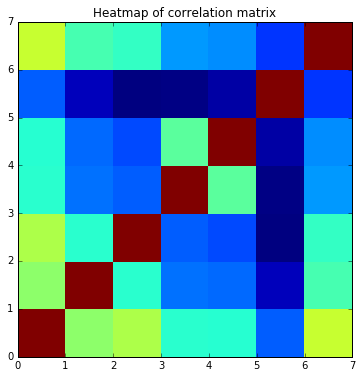

In [6]:
#convert to numpy array
x = cleaned_data.iloc[:,:-1].values
y = cleaned_data.iloc[:,-1].values

# Compute matrix of correlation coefficients
corr_matrix = np.corrcoef(x.T)

# Display heat map 
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.pcolor(corr_matrix)

ax.set_title('Heatmap of correlation matrix')

plt.show()

We could see that these factors are all independent.

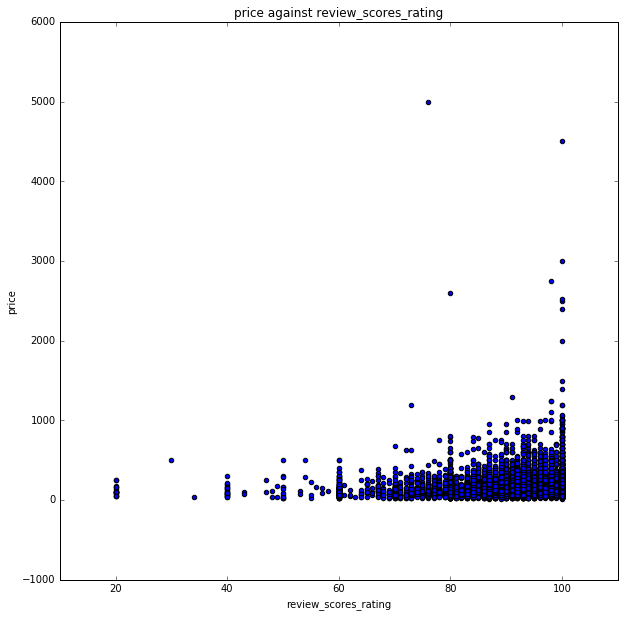

In [7]:
#scatter plot of ratings and price
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(x[:, 0], y)
ax.set_xlabel('review_scores_rating')
ax.set_ylabel('price')
ax.set_title('price against review_scores_rating')
plt.show()

Apparently there are some extreme value of prices. The abnormal values disturbs our observations, so we constrin the range of price into a reasonable interval.

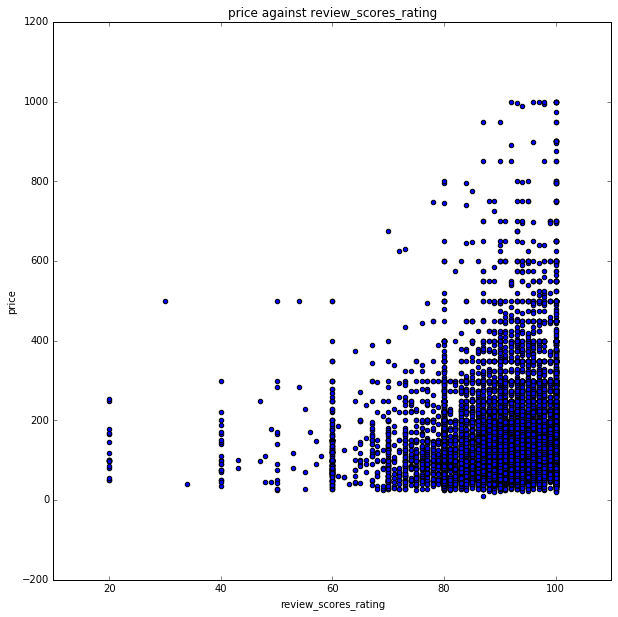

In [23]:
index = y<=1000
new_y=y[index]
new_x=x[index]
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(new_x[:, 0],new_y)
ax.set_xlabel('review_scores_rating')
ax.set_ylabel('price')
ax.set_title('price against review_scores_rating')
plt.show()

Now we could clearly see that most ratings are between 70 and 100. The low prices(under 100 dollors) exsit in nearly all possible ratings. But with the increase of rating, the potential of being high priced is gradually growing, and hence the range of the price expands, including low prices and some relatively high prices.

Now let's see the distribution of prices:

18595
mean of prices： 151.10282334


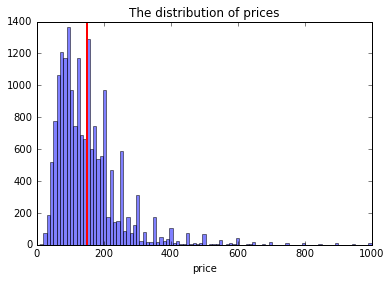

In [310]:
from scipy import stats
print(new_y.shape[0])
plt.hist(new_y, bins=100, color='blue', alpha=0.5)
mean = np.mean(new_y)
print "mean of prices：",mean
plt.axvline(x=mean, linewidth=2, color='red' )
plt.title("The distribution of prices")
plt.xlabel("price")
plt.show()


mean of rating scores： 92.2354396343


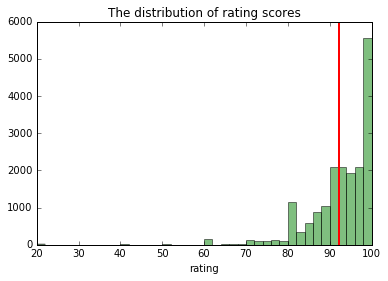

In [312]:
#scatter plot of ratings
plt.hist(new_x[:,0], bins=40, color='green',alpha=0.5)
mean = np.mean(new_x[:,0])
print "mean of rating scores：", mean
plt.axvline(x=mean, linewidth=2, color='red' )
plt.title("The distribution of rating scores")
plt.xlabel("rating")
plt.show()

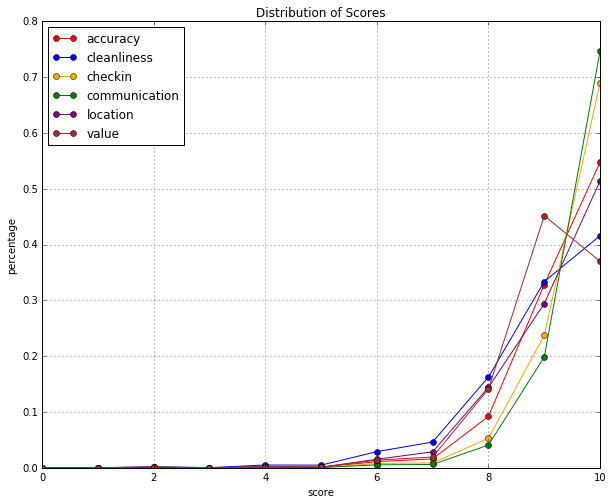

In [11]:
colors =['red','blue', 'orange', 'green', 'purple', 'brown']
names = ['accuracy', 'cleanliness','checkin', 'communication', 'location', 'value']

n = new_x.shape[0]
plt.figure(figsize=(10,8))

for i in range(6):
    plt.plot(np.bincount(np.int_(new_x[:,i+1]))/float(n), marker='o', color=colors[i], 
             label=names[i])
    
plt.xlabel('score'); 
plt.ylabel('percentage')
plt.title("Distribution of Scores")
plt.legend(loc='best')
plt.grid()
plt.show()

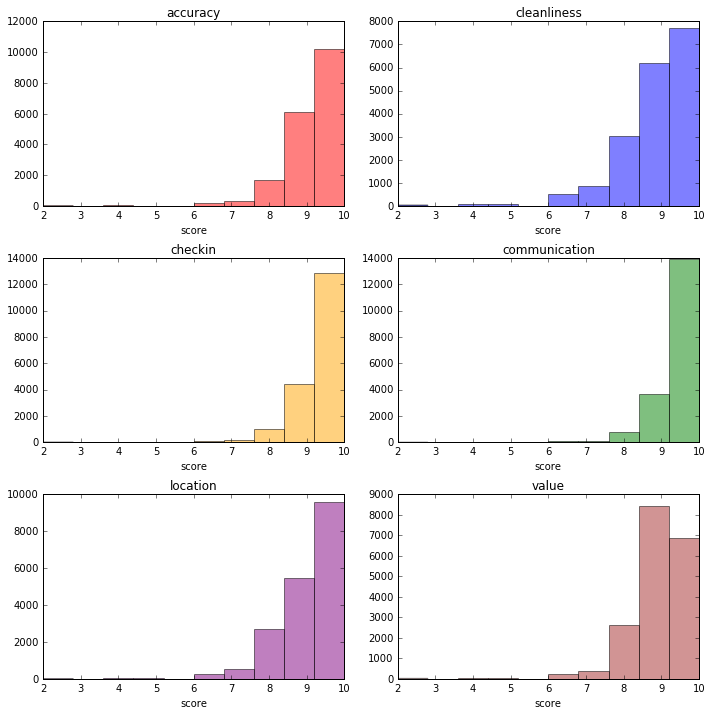

In [318]:
fig, ax = plt.subplots(3, 2, figsize=(10, 10))


for i in range(3):
    for j in range(2):
        k=i*2+j
        ax[i,j].hist(new_x[:,k+1], color=colors[k], alpha=0.5)
        ax[i,j].set_title(names[k])
        ax[i,j].set_xlabel('score')
        
plt.tight_layout()
plt.show()

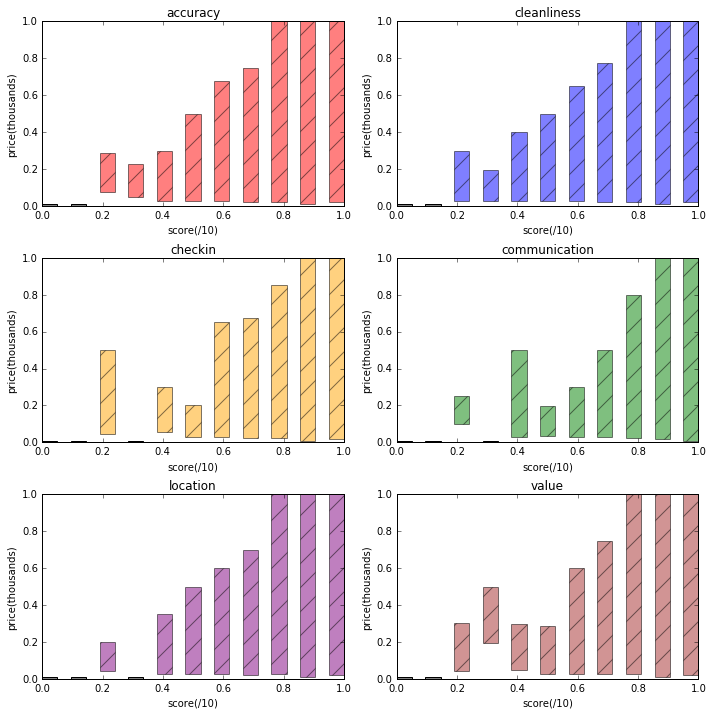

In [333]:
import matplotlib.patches as patches
fig, ax = plt.subplots(3, 2, figsize=(10, 10))

def plotit(k, ax):
    ds = pd.DataFrame({'x': new_x[:,k+1], 'y': new_y})
    s=[]
    for i in range(11):
        temp=ds[ds.x==i]
        high = 0
        low = 0
        if not math.isnan(np.max(temp)[1]):
            high=np.max(temp)[1]
        if not math.isnan(np.min(temp)[1]):
            low=np.min(temp)[1]   
        s.append({'high': high, 'low':low})
    #print s
    for i in range(11):
        if s[i]['high']==0:
            #draw a black rectangle to indicate 
            p = patches.Rectangle(
            (0+i*0.095, s[i]['low']/1000), 0.05, 0.01,
             facecolor="grey", alpha = 1
            )
        else:
            p = patches.Rectangle(
                (0+i*0.095, s[i]['low']/1000), 0.05, (s[i]['high']-s[i]['low'])/1000,
                hatch='/', facecolor=colors[k], alpha = 0.5
            )

        ax.add_patch(p)
        ax.set_xlabel('score(/10)')
        ax.set_ylabel('price(thousands)')
        ax.set_title(names[k])
        

for i in range(3):
    for j in range(2):
        k=i*2+j
        plotit(k, ax[i,j])
        
plt.tight_layout()
plt.show() 